# Basics

_Jenny Kim, Phil Marshall_

In this notebook we demonstrate some of the basic functionality of the `SLRealizer` class, including:

* Reading in an `OM10` mock lens catalog and selecting a subsample of lenses to work on.

* Reading in an observation history, and setting up a list of `LensSystem` objects.

* Visualizing the `SLRealizer` model for a given lens system, showing the positions, sizes and brightnesses of lens galaxy and lensed quasars, at each epoch. 

### Requirements

You will need to have the `om10` package installed:
```
pip install om10
```

## Reading in the Lens Catalog and Observation History

The OM10 input catalog is provided as part of the OM10 package. The SLRealizer package provides an example observation history file in `csv` format, extracted from the `minion_1016` OpSim run output. 

In [13]:
import om10
import desc.slrealizer

It's always a good idea to make the sample of lenses you are interested in first, and then just work with that sample. Let's make a LSST-like sample, and compute the colors of the lens and source components.
<!-- If you do not have `qso_mock.fits` file, you can download it here : [OM10 Repository](https://github.com/drphilmarshall/OM10/tree/master/data).-->

In [14]:
db = om10.DB()
db.select_random(maglim=23.3,area=18000.0,IQ=0.75)
db.paint(synthetic=True)
realizer = desc.slrealizer.SLRealizer(catalog=db, observation="../../data/twinkles_observation_history.csv")

OM10: Full db.lenses table contains 15658 systems
OM10: Initial db.sample contains 15658 systems
OM10: selection yields 2813 lenses


## Visualizing a `LensSystem`

We will pick a lens from the OM10 sample, and plot a cartoon representation of it at a random epoch. We can do this by first picking a lens manually and then passing that lens' ID to the `plot_random_lens_date` in the realizer class, just as the code below. This notebook does this for five times.

Populating the interactive namespace from numpy and matplotlib
Number of lenses with image separation > 1.0 arcsec =  1905
Number of these with 4 images =  282
Number of these with i3 < 22 =  125
OM10: Extracted OM10 lens number 3499943:
 LENSID FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
------- -------- ---- ----- ... ------------- ------------- -------------
3499943        0    2 0.424 ...         24.83 24.8158104475 25.2851864887
0
[ 5.0724 -5.5615  0.      0.    ]
NIMG
----
   2
Quasar Mag, Lens Mag
u_SDSS_quasar
-------------
27.0482202234 u_SDSS_lens 
------------
24.372385395
Quasar Alpha, Lens Alpha
0.0861347237522 1
Quasar Position X, Y 0.33264229 -0.67563437
Lens Position X, Y 0.03744229 -0.09503437
1
[ 5.0724 -5.5615  0.      0.    ]
NIMG
----
   2
Quasar Mag, Lens Mag
u_SDSS_quasar
-------------
          nan u_SDSS_lens 
------------
24.372385395
Quasar Alpha, Lens Alpha
1 nan
Quasar Position X, Y -0.09565771 0.32886563
Lens Position X, Y 0.03744229 

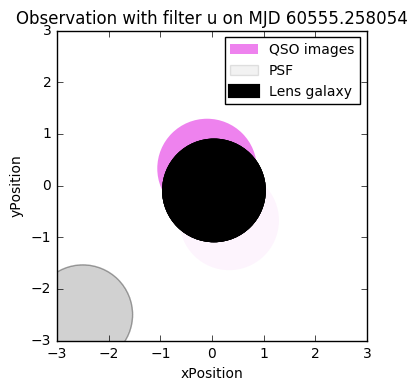

In [15]:
%matplotlib inline
%pylab inline
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)

# Choose a good lens system, with large imsep and 4 images:
                      
wide = db.sample[np.where(db.sample['IMSEP'] > 1.0)]
print "Number of lenses with image separation > 1.0 arcsec = ",len(wide)

wide_quads = wide[np.where(wide['NIMG'] == 4)]
print "Number of these with 4 images = ",len(wide_quads)

# BUGGY: IMAGE NUM IS NOT FOUR

bright_wide_quads = wide[np.where(wide_quads['MAGI'] < 22)]
print "Number of these with i3 < 22 = ",len(bright_wide_quads)

db.sample = bright_wide_quads    
                      
k = db.sample[0]['LENSID']

realizer.plot_lens_random_date(lensID=k)

OM10: Extracted OM10 lens number 3499943:
 LENSID FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
------- -------- ---- ----- ... ------------- ------------- -------------
3499943        0    2 0.424 ...         24.83 24.8158104475 25.2851864887
0
[ 5.0724 -5.5615  0.      0.    ]
NIMG
----
   2
Quasar Mag, Lens Mag
i_SDSS_quasar
-------------
26.5930337347  i_SDSS_lens 
-------------
19.4202639949
Quasar Alpha, Lens Alpha
0.00139851763637 1
Quasar Position X, Y 0.33264229 -0.67563437
Lens Position X, Y 0.03744229 -0.09503437
1
[ 5.0724 -5.5615  0.      0.    ]
NIMG
----
   2
Quasar Mag, Lens Mag
i_SDSS_quasar
-------------
          nan  i_SDSS_lens 
-------------
19.4202639949
Quasar Alpha, Lens Alpha
1 nan
Quasar Position X, Y -0.09565771 0.32886563
Lens Position X, Y 0.03744229 -0.09503437
2
[ 5.0724 -5.5615  0.      0.    ]
NIMG
----
   2
Quasar Mag, Lens Mag
i_SDSS_quasar
-------------
         -inf  i_SDSS_lens 
-------------
19.4202639949
Quasar Alpha, Lens Al

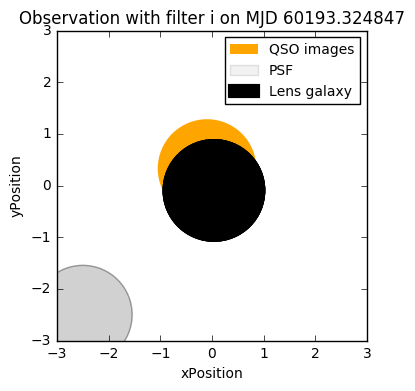

In [16]:
realizer.plot_lens_random_date(lensID=k)

OM10: Extracted OM10 lens number 3499943:
 LENSID FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
------- -------- ---- ----- ... ------------- ------------- -------------
3499943        0    2 0.424 ...         24.83 24.8158104475 25.2851864887
0
[ 5.0724 -5.5615  0.      0.    ]
NIMG
----
   2
Quasar Mag, Lens Mag
i_SDSS_quasar
-------------
26.5930337347  i_SDSS_lens 
-------------
19.4202639949
Quasar Alpha, Lens Alpha
0.00139851763637 1
Quasar Position X, Y 0.33264229 -0.67563437
Lens Position X, Y 0.03744229 -0.09503437
1
[ 5.0724 -5.5615  0.      0.    ]
NIMG
----
   2
Quasar Mag, Lens Mag
i_SDSS_quasar
-------------
          nan  i_SDSS_lens 
-------------
19.4202639949
Quasar Alpha, Lens Alpha
1 nan
Quasar Position X, Y -0.09565771 0.32886563
Lens Position X, Y 0.03744229 -0.09503437
2
[ 5.0724 -5.5615  0.      0.    ]
NIMG
----
   2
Quasar Mag, Lens Mag
i_SDSS_quasar
-------------
         -inf  i_SDSS_lens 
-------------
19.4202639949
Quasar Alpha, Lens Al

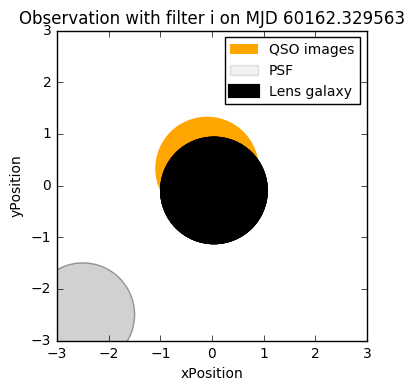

In [17]:
realizer.plot_lens_random_date(lensID=k)

OM10: Extracted OM10 lens number 3499943:
 LENSID FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
------- -------- ---- ----- ... ------------- ------------- -------------
3499943        0    2 0.424 ...         24.83 24.8158104475 25.2851864887
0
[ 5.0724 -5.5615  0.      0.    ]
NIMG
----
   2
Quasar Mag, Lens Mag
r_SDSS_quasar
-------------
  26.81535425  r_SDSS_lens 
-------------
20.1920998317
Quasar Alpha, Lens Alpha
0.0023138866443 1
Quasar Position X, Y 0.33264229 -0.67563437
Lens Position X, Y 0.03744229 -0.09503437
1
[ 5.0724 -5.5615  0.      0.    ]
NIMG
----
   2
Quasar Mag, Lens Mag
r_SDSS_quasar
-------------
          nan  r_SDSS_lens 
-------------
20.1920998317
Quasar Alpha, Lens Alpha
1 nan
Quasar Position X, Y -0.09565771 0.32886563
Lens Position X, Y 0.03744229 -0.09503437
2
[ 5.0724 -5.5615  0.      0.    ]
NIMG
----
   2
Quasar Mag, Lens Mag
r_SDSS_quasar
-------------
         -inf  r_SDSS_lens 
-------------
20.1920998317
Quasar Alpha, Lens Alp

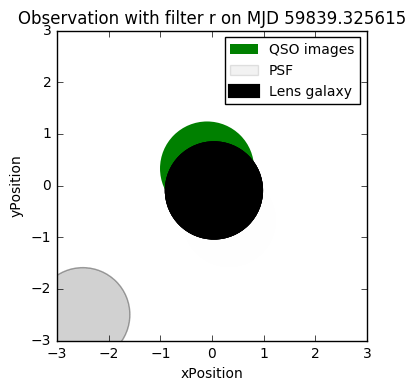

In [18]:
realizer.plot_lens_random_date(lensID=k)